# Confusion Matrix for Fashion MNIST


Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
images (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 46us/sample - loss: 1.0858 - acc: 0.6356 - val_loss: 0.6368 - val_acc: 0.7905
Epoch 2/30
54000/54000 [==============================] - 1s 17u

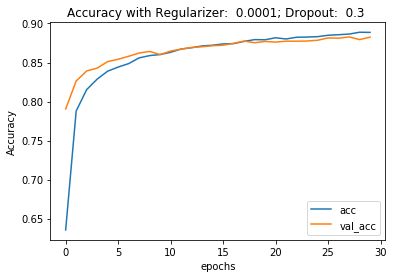

In [ ]:
# Confusion Matrix for Fashion MNIST

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix

value = 0.0001
dropout = 0.3
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()
pixels = 28 * 28 
train_img = train_img.reshape( (60000, pixels) ).astype(np.float32) / 255.0
test_img = test_img.reshape( (10000, pixels) ).astype(np.float32)  / 255.0
inp = Input(shape=(pixels,), name='images')
z = Dense(100, activation='relu', kernel_regularizer=regularizers.l2(value), bias_regularizer=regularizers.l2(value), name='hidden')(inp)
z = Dropout(dropout)(z)
z = Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(value), bias_regularizer=regularizers.l2(value), name='output')(z)

our_first_model = Model(inputs=inp, outputs=z)
our_first_model.summary()
plot_model(our_first_model, to_file='our_first_model.png', show_shapes=True, show_layer_names=True)
our_first_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
results = our_first_model.fit(train_img,  train_label, batch_size=1000, epochs=30, validation_split=0.1)
our_first_model.save('fmnist_trained.hdf5')

loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['acc']
val_acc = results.history['val_acc']
epochs = np.arange(len(loss))

plt.figure()
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy with Regularizer: {value : 3.2g}; Dropout: {dropout : 3.2g} ')
plt.legend()


Confusion matrix is 
 [[836   4  14  36   3   1  99   0   7   0]
 [  2 965   2  22   5   0   3   0   1   0]
 [ 15   1 783  13 110   1  75   0   2   0]
 [ 23   8   8 895  33   1  28   0   4   0]
 [  0   1  81  34 809   0  73   0   2   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [128   1  76  34  76   0 674   0  11   0]
 [  0   0   0   0   0  24   0 938   0  38]
 [  6   1   2   6   6   3   7   5 964   0]
 [  0   0   0   0   0   7   1  26   0 966]]


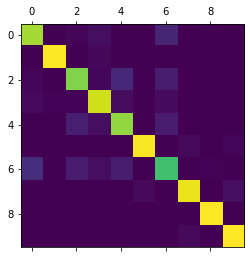

In [ ]:
# Confusion matrix 

data = load_model('fmnist_trained.hdf5')

dec = []
for i in range(len(test_img)):
  pred = data.predict(test_img[i].reshape(1,pixels))
  num = 10
  pred = pred.reshape(10)
  dec.append(pred)
  class_decision = np.argmax(pred)
dec = np.array(dec)
cm = np.dot(dec.T,dec)
y_pred =[]
for i in range(len(dec)):
  y_pred.append(np.argmax(dec[i]))
y_pred = np.array(y_pred)
y_actu = test_label
x = confusion_matrix(y_actu, y_pred)
cm =[]
for i in range(len(x)):
  temp = x[i]
  cm.append(temp)
print("Confusion matrix is \n",np.array(cm))
plt.figure()
plt.matshow(cm, fignum=1)



1.   Class 0 is most likely confused with class 6.
2.   Class 1 is most likely confused with class 3.
3.   Class 2 is most likely confused with class 4.
4.   Class 3 is most likely confused with class 6.
5.   Class 4 is most likely confused with class 2.
6.   Class 5 is most likely confused with class 7.
7.   Class 6 is most likely confused with class 0.
8.   Class 7 is most likely confused with class 9.
9.   Class 8 is most likely confused with class 6.
10.  Class 9 is most likely confused with class 7.

















Overall, the two classes that are most likely to be confused with are class 6 with class 0.

# Exploring Regularization on Fashion MNIST


Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 2s 40us/sample - loss: 0.8898 - acc: 0.7161 - val_loss: 0.5572 - val_acc: 0.8117
Epoch 2/40
54000/54000 [==============================] - 1s 15us/sample - loss: 0.5185 - acc: 0.8263 - val_loss: 0.4826 - val_acc: 0.8303
Epoch 3/40
54000/54000 [==============================] - 1s 15us/sample - loss: 0.4593 - acc: 0.8446 - val_loss: 0.4422 - val_acc: 0.8457
Epoch 4/40
54000/54000 [==============================] - 1s 15us/sample - loss: 0.4284 - acc: 0.8539 - val_loss: 0.4228 - val_acc: 0.8527
Epoch 5/40
54000/54000 [==============================] - 1s 15us/sample - loss: 0.4105 - acc: 0.8579 - val_loss: 0.4087 - val_acc: 0.8565
Epoch 6/40
54000/54000 [==============================] - 1s 16us/sample - loss: 0.3940 - acc: 0.8633 - val_loss: 0.3946 - val_acc: 0.8618
Epoch 7/40
54000/54000 [==============================] - 1s 15us/sample - loss: 0.3785 - acc: 0.8690 - val_loss: 0.3

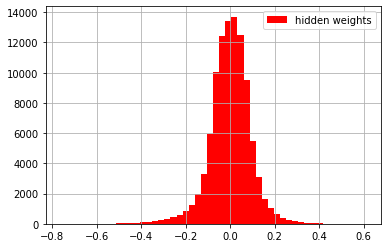

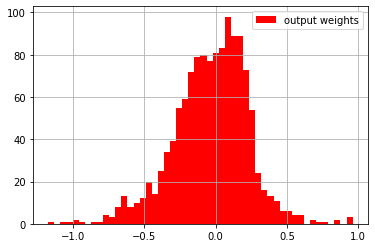

In [ ]:
# Exploring Regularization on Fashion MNIST
# One hidden layer with ReLu activation, 128 nodes. No regularization, no dropout.

import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()
pixels = 28 * 28 
train_img = train_img.reshape( (60000, pixels) ).astype(np.float32) / 255.0
test_img = test_img.reshape( (10000, pixels) ).astype(np.float32)  / 255.0
inp = keras.layers.Input(shape=(pixels,), name='images')
z = keras.layers.Dense(128, activation='relu', name='hidden')(inp)
z = keras.layers.Dense(10, activation='softmax', name='output')(z)
our_first_model = keras.Model(inputs=inp, outputs=z)

our_first_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
results = our_first_model.fit(train_img,  train_label, batch_size=1000, epochs=40, validation_split=0.1)
our_first_model.save('fmnist_trained_1_q3.hdf5')
trained_parameters = our_first_model.get_layer('hidden').get_weights()
weights_hidden = trained_parameters[0]
trained_parameters1 = our_first_model.get_layer('output').get_weights()
weights_output = trained_parameters1[0]
loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['acc']
val_acc = results.history['val_acc']

epochs = np.arange(len(loss))
data = load_model('fmnist_trained.hdf5')
s = np.reshape(weights_hidden,-1)

fig = plt.figure()
plt.hist(s, bins = 50, color = 'red', label = 'hidden weights')
plt.grid(True)
plt.legend()
axes = plt.gca()

s1 = np.reshape(weights_output,-1)
fig = plt.figure()
plt.hist(s1, bins = 50, color='red', label = 'output weights')
plt.grid(True)
plt.legend()
axes = plt.gca()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
images (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
hidden (Dense)               (None, 48)                37680     
_________________________________________________________________
dropout_13 (Dropout)         (None, 48)                0         
_________________________________________________________________
output (Dense)               (None, 10)                490       
Total params: 38,170
Trainable params: 38,170
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 2s 38us/sample - loss: 1.2268 - acc: 0.5818 - val_loss: 0.7057 - val_acc: 0.7698
Epoch 2/40
54000/54000 [==============================] - 1s 12u

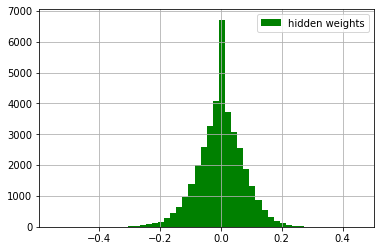

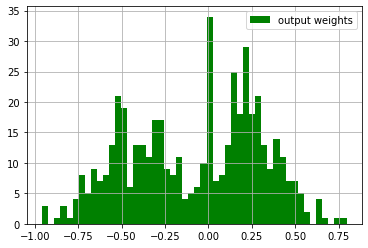

In [ ]:
# One hidden layer with ReLu activation, 48 nodes. L2 regularization with coeficient 0.0001 and doprout with rate 0.2 at the hidden layer.

value = 0.0001
dropout = 0.2
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()
pixels = 28 * 28 
train_img = train_img.reshape( (60000, pixels) ).astype(np.float32) / 255.0
test_img = test_img.reshape( (10000, pixels) ).astype(np.float32)  / 255.0
inp = Input(shape=(pixels,), name='images')
z = Dense(48, activation='relu', kernel_regularizer=regularizers.l2(value), bias_regularizer=regularizers.l2(value), name='hidden')(inp)
z = Dropout(dropout)(z)
z = Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(value), bias_regularizer=regularizers.l2(value), name='output')(z)

our_first_model = Model(inputs=inp, outputs=z)
our_first_model.summary()
plot_model(our_first_model, to_file='fmnist_trained_2_q3.png', show_shapes=True, show_layer_names=True)
our_first_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
results = our_first_model.fit(train_img,  train_label, batch_size=1000, epochs=40, validation_split=0.1)
our_first_model.save('fmnist_trained_2_q3.hdf5')

trained_parameters = our_first_model.get_layer('hidden').get_weights()
weights_hidden1 = trained_parameters[0]
trained_parameters1 = our_first_model.get_layer('output').get_weights()
weights_output1 = trained_parameters1[0]

loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['acc']
val_acc = results.history['val_acc']
epochs = np.arange(len(loss))

data = load_model('fmnist_trained.hdf5')
dec = []
for i in range(len(test_img)):
  pred = data.predict(test_img[i].reshape(1,pixels))
  num = 10
  pred = pred.reshape(10)
  dec.append(pred)
  class_decision = np.argmax(pred)
dec = np.array(dec)

cm = np.dot(dec.T,dec)
s2 = np.reshape(weights_hidden1,-1)

fig = plt.figure()
plt.hist(s2, bins = 50, color='green', label = 'hidden weights')
plt.grid(True)
plt.legend()
axes = plt.gca()

s3 = np.reshape(weights_output1,-1)
fig = plt.figure()
plt.hist(s3, bins = 50, color='green', label = 'output weights')
plt.grid(True)
plt.legend()
axes = plt.gca()

 
*   From the above figure we can see that the weights have higher variance in the first model than the second model. Therefore L2 regularization has reduced the weights.
*  Also we can see that the model with no regularizers and dropout layer has the weight
distributed.



# MLP for the Human/Machine Binary Data


Train on 6680 samples, validate on 1670 samples
Epoch 1/40
6680/6680 [==============================] - 3s 378us/sample - loss: 0.7171 - acc: 0.5175 - val_loss: 0.7008 - val_acc: 0.5228
Epoch 2/40
6680/6680 [==============================] - 1s 152us/sample - loss: 0.6832 - acc: 0.5558 - val_loss: 0.6865 - val_acc: 0.5365
Epoch 3/40
6680/6680 [==============================] - 1s 160us/sample - loss: 0.6709 - acc: 0.5711 - val_loss: 0.6810 - val_acc: 0.5569
Epoch 4/40
6680/6680 [==============================] - 1s 159us/sample - loss: 0.6638 - acc: 0.5907 - val_loss: 0.6785 - val_acc: 0.5527
Epoch 5/40
6680/6680 [==============================] - 1s 160us/sample - loss: 0.6575 - acc: 0.5961 - val_loss: 0.6740 - val_acc: 0.5527
Epoch 6/40
6680/6680 [==============================] - 1s 168us/sample - loss: 0.6524 - acc: 0.6076 - val_loss: 0.6731 - val_acc: 0.5605
Epoch 7/40
6680/6680 [==============================] - 1s 165us/sample - loss: 0.6484 - acc: 0.6120 - val_loss: 0.6729 - va

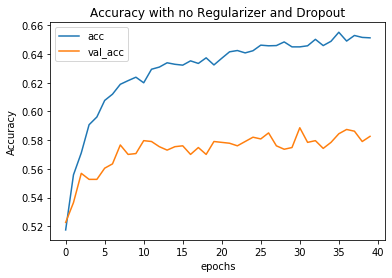

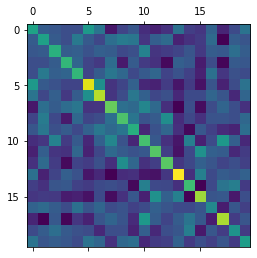

In [ ]:
# MLP for the Human/Machine Binary Data

import h5py
import numpy as np
file_bin = h5py.File('binary_random_sp2020.hdf5','r')

human = file_bin['human']
machine = file_bin['machine']
human = np.array(human)
machine = np.array(machine)

train_set = np.append(human,machine,axis=0)
k = np.arange(8350)
np.random.shuffle(k)
train_l_human = np.ones(4175)
train_l_machine = np.zeros(4175)
train_label = np.array(np.append(train_l_human,train_l_machine))
train_set = np.array(train_set[k])
train_label = np.array(train_label[k])

pixels = 20
inp = keras.layers.Input(shape=(pixels,), name='images')
z = keras.layers.Dense(20, activation='relu', name='hidden')(inp)
z = keras.layers.Dense(1, activation='sigmoid', name='output')(z)
our_first_model = keras.Model(inputs=inp, outputs=z)
our_first_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
results = our_first_model.fit(train_set,  train_label, batch_size=16, epochs=40, validation_split=0.2)
our_first_model.save('Akshay_trained.hdf5')
trained_parameters2 = our_first_model.get_layer('hidden').get_weights()
weights_hidden_20 = trained_parameters2[0]

loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['acc']
val_acc = results.history['val_acc']
epochs = np.arange(len(loss))
data = load_model('Akshay_trained.hdf5')

plt.figure()
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy with no Regularizer and Dropout')
plt.legend()
print("weight matrix is \n", weights_hidden_20)
plt.matshow(np.dot(weights_hidden_20,weights_hidden_20.T))

As we can see from the coorelation matrix, the weights are uncorrelated. So we can reduce the feature size by utilizing only a few of the weights to model it.